# Review of multiple regression

Multiple regression analysis is linear regression with several **continuous** predictors.

In multiple regression, parameter estimates represent *marginal effect* of predictors. In other words, the parameter estimates represent the predictor's effect on the the response when **all other variables in the model** are held constant at their means.

This allows us to
- Evaluate independent effects of several potentially correlated variables
- Control for nuisance variables

An analysis of covariance is similar, but the model contains a mixture of continuous and categorical variables.

The code below simulates two **correlated** predictor variables and fits a multiple regression model to the data.

In [1]:
set.seed(187)
x1 = rnorm(200, 10, 2)
x2 = 0.5*x1 + rnorm(200, 0, 4)
y = 0.7*x1 + 2.2*x2 + rnorm(200, 0, 4)

m = lm(y~x1+x2)

coefs = summary(m)$coef

[1] 15.87753


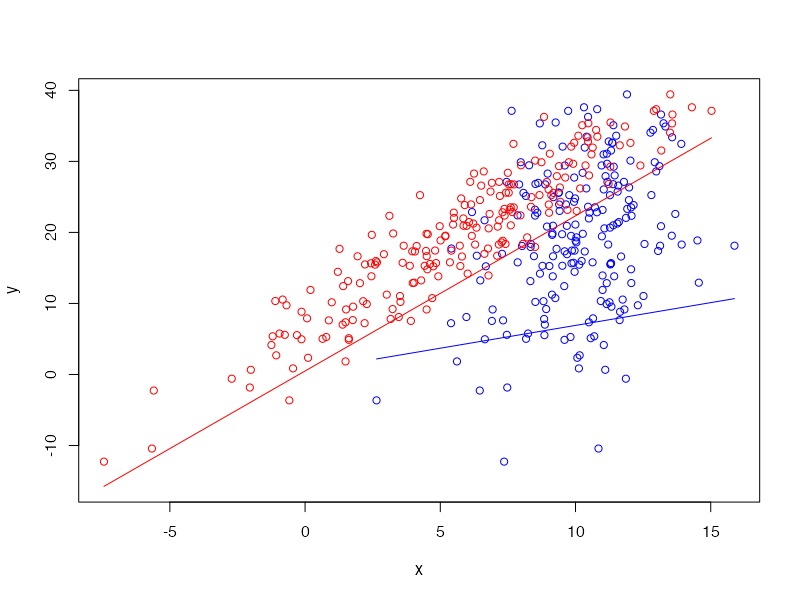


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4276 -2.7240 -0.0065  2.7041  9.7580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48722    1.34745   0.362    0.718    
x1           0.64178    0.13246   4.845 2.56e-06 ***
x2           2.18446    0.06422  34.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.618 on 197 degrees of freedom
Multiple R-squared:  0.8683,	Adjusted R-squared:  0.8669 
F-statistic: 649.3 on 2 and 197 DF,  p-value: < 2.2e-16


In [2]:
print(max(x1))
plot(
  x1, y, col = "blue",
  xlim = c(min(min(x1), min(x2)), max(max(x1), max(x2))),
  ylim = c(
    min(min(coefs[2,1] * min(x1) + coefs[1,1]), min(coefs[3,1] * min(x2) + coefs[1,1]), min(y)),
    max(max(coefs[2,1] * max(x1) + coefs[1,1]), max(coefs[3,1] * max(x2) + coefs[1,1]), max(y))
),
  xlab = "x"
)
points(x2, y, col = "red")
points(c(min(x1), max(x1)), c(coefs[2,1] * min(x1) + coefs[1,1], coefs[2,1] * max(x1) + coefs[1,1]), type = "l", col = "blue")
points(c(min(x2), max(x2)), c(coefs[3,1] * min(x2) + coefs[1,1], coefs[3,1] * max(x2) + coefs[1,1]), type = "l", col = "red")
summary(m)

The **coefficient of determination** $(r^2)$ is the variance explained by the model.

In [3]:
y_hat = coefs[1,1] + coefs[2,1]*x1 + coefs[3,1]*x2
print(var(y_hat))

print(var(y_hat)/var(y))

[1] 85.4221
[1] 0.8682827


To get the variance explained only by $x_1$ or $x_2$, we hold the other constant at its mean.

In [4]:
y_hat1 = coefs[1,1] + coefs[2,1]*x1 + coefs[3,1]*mean(x2)
print(var(y_hat1))
print(var(y_hat1)/var(y))

y_hat2 = coefs[1,1] + coefs[2,1]*mean(x1) + coefs[3,1]*x2
print(var(y_hat2))  # Much more variance is explained by y2
print(var(y_hat2)/var(y))

[1] 1.608668
[1] 0.01635149
[1] 79.29333
[1] 0.8059861


## Multicolinearity

**Multicolinearity** is when multiple predictors are strongly correlated (correlation between predictors = 0.6-0.7)

*Variance inflation factors* can quantify colinearity, which is defined as

$$
VIF_i = \frac{1}{1-r^2_i}
$$

where the $r^2$ term comes from a regression of covariate $i$ on the other covariates in the model. Applied to our model $i = x_1$.

Note that in this case, $VIF_{x1} = VIF_{x2}$.

In [5]:
m1 = lm(x2~x1)
r2 = summary(m1)$r.squared
1/(1-r2)

[1] 1.041714

## Exercise: variable selection

Select variables to include in a model

In [6]:
library(here)
df <- read.csv(here("Exercises", "Exercise-4", "Data", "alpineplants.csv"))
names(df)

here() starts at /Users/otodreas/Lund/Courses/BIOS15/BIOS15-Coursework


 [1] "Carex.bigelowii"    "Thalictrum.alpinum" "mean_T_winter"     
 [4] "max_T_winter"       "min_T_winter"       "mean_T_summer"     
 [7] "max_T_summer"       "min_T_summer"       "light"             
[10] "snow"               "soil_moist"         "altitude"          


Call:
lm(formula = df$Carex.bigelowii ~ df$mean_T_summer + df$min_T_summer + 
    df$altitude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7465 -0.9404 -0.3791  0.7630  5.3590 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -45.96034   17.29877  -2.657  0.00931 **
df$mean_T_summer   0.85327    0.36505   2.337  0.02161 * 
df$min_T_summer   -0.53476    0.20006  -2.673  0.00891 **
df$altitude        0.03464    0.01153   3.005  0.00343 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.571 on 91 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2406,	Adjusted R-squared:  0.2156 
F-statistic: 9.612 on 3 and 91 DF,  p-value: 1.414e-05



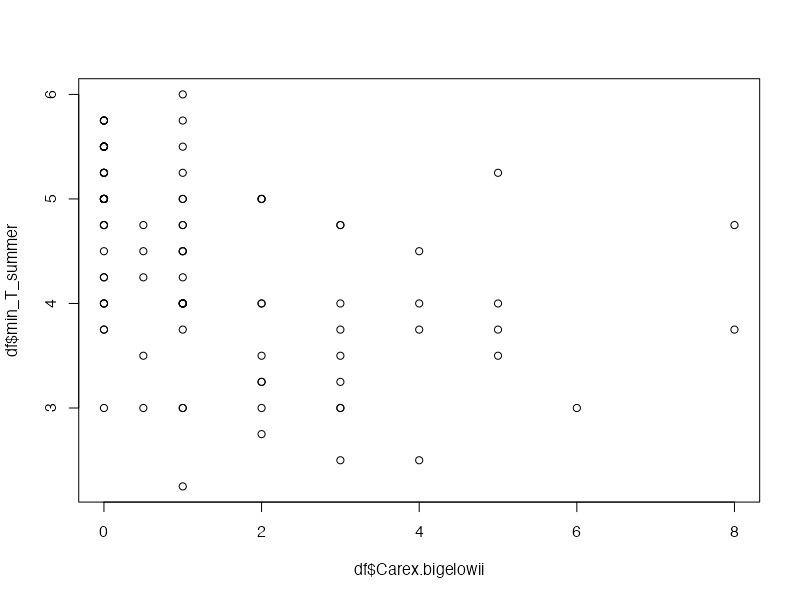

In [35]:
preds <- names(df)[-1][-1]  # Assign all predictors to list preds
m_Cb <- lm(
  df$Carex.bigelowii ~
  # df$mean_T_winter +
  # df$max_T_winter +
  # df$min_T_winter +
  df$mean_T_summer +
  # df$max_T_summer +
  df$min_T_summer +
  # df$light +
  # df$snow +
  # df$soil_moist +
  df$altitude
)
print(summary(m_Cb))

plot(df$Carex.bigelowii, df$min_T_summer)